# Filter ibtracs

In [1]:
%load_ext autoreload
%autoreload 2
import utils.main_utils as ut
import pandas as pd

In [2]:
min_year = 1980
hours = ["00", "06", "12", "18"]

ut.filter_tracks(min_year=min_year, hours=hours)

Number of TCs: 4695
Number of TCs: 4096


In [3]:
import pickle

with open("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/valid_dates_1980_00_06_12_18.pkl", "rb") as fi:
    valid_dates = pickle.load(fi)
valid_dates["2000"]["06"] #6, 11 # 5

['01',
 '06',
 '07',
 '08',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25']

# Write params

In [ ]:
# write 6 months of data into input params

ut.write_params_for_period(output_path="/users/lpoulain/louis/TCBench_0.1/input_params/", start_date="20200301", end_date="20200831", max_lead=168, step=12, debug=False)

In [1]:
%load_ext autoreload
%autoreload 2

import scripts.utils as ut
import pandas as pd
tc_id = "2005236N23285"
#tc_id = "2000185N15117"
path = "/users/lpoulain/louis/TCBench_0.1/input_params"
df = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv",
                 dtype="string", na_filter=False)
ut.write_params_for_tc(f"{path}/{2005}/", df, TC_id=tc_id, season="2005", step=6, max_lead=6, debug=False)

In [ ]:
# take one tc/basin for several seasons and writes params

%load_ext autoreload
%autoreload 2
import scripts.utils as ut

seasons = ["2008", "2023"]	
ut.write_several_seasons(output_path=f"./input_params/", seasons=seasons, step=6, max_lead=168, 
                          ibtracs_path='/work/FAC/FGSE/IDYST/tbeucler/default/milton/repos/alpha_bench/tracks/ibtracs/ibtracs.ALL.list.v04r00.csv',
                          as_range=True)

# Distance calculator

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append('/users/lpoulain/louis/TCBench_0.1/scripts/utils/utils.py')
print(os.getcwd())
import utils.main_utils as ut

df_path = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv"
step = 3*4*6#168
mode = "deg"
max_dist = ut.max_historical_distance_within_step(df_path=df_path, mode=mode, step=step)

/work/FAC/FGSE/IDYST/tbeucler/default/milton/repos/TCBench_0.1/scripts
1/4096
409/4096
818/4096
1227/4096
1636/4096
2045/4096
2454/4096
2863/4096
3272/4096
3681/4096
4090/4096
Max dists on a 72h period:
 Overall dist: 5542.2097159082405km (TC 2010069S12188, idx (28, 40)).
 Max lon dist: 64.2deg
 Max lat dist: 40.4deg


Text(0.5, 1.0, 'Distribution of distances traveled by TCs during a week\nMax: 7421.717 km, Mean: 1246.979 km, Std: 854.635 km')

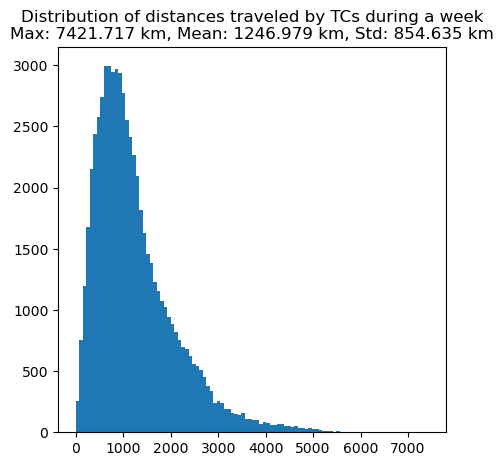

In [14]:
import numpy as np
import matplotlib.pyplot as plt
"""
d6 = np.load("./6h_dists.npy")
print(np.mean(d), np.std(d))
print([np.count_nonzero(d>dmax) for dmax in [400, 600, 800, 1000, 1200, 1400]])
plt.figure()
_, _, _ = plt.hist(d[d>400], bins=100)
"""	
d120 = np.load("./72h_dists.npy")
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
_, _, _ = ax.hist(d120, bins=100)
ax.set_title("Distribution of distances traveled by TCs during a week"+\
    f"\nMax: {np.max(d120):.3f} km, Mean: {np.mean(d120):.3f} km, Std: {np.std(d120):.3f} km")

Text(0.5, 1.0, 'Max dist: 83.400deg,\n Mean: 11.963deg, Std: 9.386deg, 95th %tile: 29.800deg')

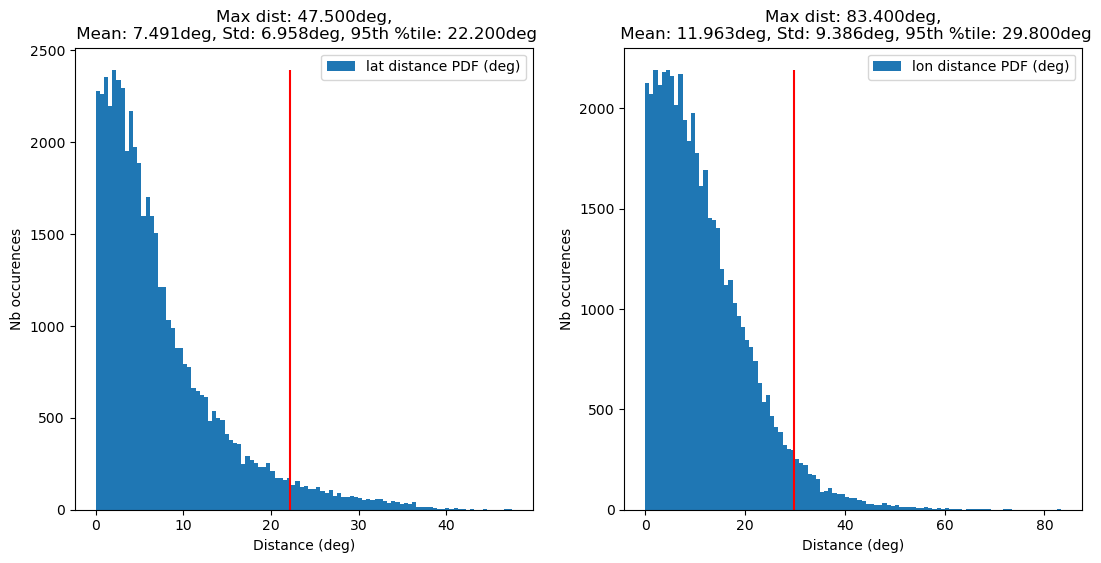

In [19]:
d120_lat = np.load(f"./72h_dists_lats_{mode}.npy")
d120_lon = np.load(f"./72h_dists_lons_{mode}.npy")

fig, axs = plt.subplots(1, 2, figsize=(13, 6))
ax1, ax2 = axs
n, _, _ = ax1.hist(d120_lat, bins=100, label=f"lat distance PDF ({mode})")

lat_95 = np.percentile(d120_lat, 95)
lon_95 = np.percentile(d120_lon, 95)

ax1.vlines(lat_95, ymin=0, ymax=n.max(), color="r")
ax1.set_title(f"Max dist: {d120_lat.max():.3f}{mode},\n Mean: {np.mean(d120_lat):.3f}{mode}, Std: {np.std(d120_lat):.3f}{mode}, 95th %tile: {lat_95:.3f}{mode}")
ax1.set_xlabel(f"Distance ({mode})")
ax1.set_ylabel("Nb occurences")
ax1.legend()

n, _, _ = ax2.hist(d120_lon, bins=100, label=f"lon distance PDF ({mode})")
ax2.vlines(lon_95, ymin=0, ymax=n.max(), color="r")
ax2.set_xlabel(f"Distance ({mode})")
ax2.set_ylabel("Nb occurences")
ax2.legend()
ax2.set_title(f"Max dist: {d120_lon.max():.3f}{mode},\n Mean: {np.mean(d120_lon):.3f}{mode}, Std: {np.std(d120_lon):.3f}{mode}, 95th %tile: {lon_95:.3f}{mode}")

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

ds = xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_1999-12-09T00_to_1999-12-16T00_ldt_168_1999343S09095_small.nc")
ds

<xarray.Dataset>
Dimensions:        (time: 28, lat: 241, lon: 241, isobaricInhPa: 13)
Coordinates:
  * time           (time) timedelta64[ns] 0 days 06:00:00 ... 7 days 00:00:00
  * lon            (lon) float64 65.25 65.5 65.75 66.0 ... 124.8 125.0 125.2
  * lat            (lat) float64 -39.0 -38.75 -38.5 -38.25 ... 20.5 20.75 21.0
  * isobaricInhPa  (isobaricInhPa) float64 50.0 100.0 150.0 ... 925.0 1e+03
Data variables:
    u10            (time, lat, lon) float32 ...
    v10            (time, lat, lon) float32 ...
    t2m            (time, lat, lon) float32 ...
    z              (time, isobaricInhPa, lat, lon) float32 ...
    msl            (time, lat, lon) float32 ...
    q              (time, isobaricInhPa, lat, lon) float32 ...
    t              (time, isobaricInhPa, lat, lon) float32 ...
    tp             (time, lat, lon) float32 ...
    u              (time, isobaricInhPa, lat, lon) float32 ...
    v              (time, isobaricInhPa, lat, lon) float32 ...
    w              (time, isobaricInhPa, lat, lon) float32 ...

In [7]:
import pandas as pd

df = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv", dtype="string", na_filter=False)
df[df["SID"]=="2000031S11074"].iloc[[0,1,2,3,4,5,6,7,-7,-6,-5,-4,-3,-2,-1]][["ISO_TIME", "USA_WIND", "MLC_PRES"]]

,ISO_TIME,USA_WIND,MLC_PRES
64830,2000-01-30 18:00:00,20,
64831,2000-01-31 00:00:00,20,
64832,2000-01-31 06:00:00,25,
64833,2000-01-31 12:00:00,25,
64834,2000-01-31 18:00:00,25,
64835,2000-02-01 00:00:00,30,
64836,2000-02-01 06:00:00,25,
64837,2000-02-01 12:00:00,25,
64853,2000-02-05 12:00:00,,
64854,2000-02-05 18:00:00,,


In [15]:
df[df["SID"]=="1999343S09095"].iloc[[0,27, -2, -1]][["ISO_TIME","USA_WIND", "BOM_PRES"]]

,ISO_TIME,USA_WIND,BOM_PRES
64514,1999-12-09 00:00:00,,
64541,1999-12-15 18:00:00,60,992
64547,1999-12-17 06:00:00,35,994
64548,1999-12-17 12:00:00,30,


# Combine predictions

## OLD COMBINE

In [ ]:
%load_ext autoreload
%autoreload 2
import scripts.utils as ut

ut.combine_in_series(output_path="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
                    model_name="graphcast", remove_old=True, start_in="2008-09-29")

In [30]:
%load_ext autoreload
%autoreload 2
import scripts.utils as ut

path = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/"
model_name = "fourcastnetv2"
years = ["2007", "2008", "2009", "2010", "2011", "2019", "2020"]

ut.fast_rename(path, model_name, years=years)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## "Rename" with TC_id

In [4]:
%load_ext autoreload
%autoreload 2
import scripts.utils as ut

model = "graphcast"

ut.renaming(folder_name="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
                    model=model, remove_old=False, cut=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-03-10T00_to_2000-03-14T00_ldt_96.nc
1/1: 2000-03-10T00 to 2000-03-14T00
Model: graphcast

2000-03-10T00 to 2000-03-14T00 (96h) - 1/1
!!! Removing 1 old files !!! 15s to STOP if this is a mistake


# Save small regions

In [ ]:
"""from scripts import utils as ut
import pandas as pd
import xarray as xr
import numpy as np
%load_ext autoreload
%autoreload 2

ds_path = "/scratch/lpoulain/panguweather/pangu_d_20180913_t_0600_lt_6-144h.nc"
path = "/work/FAC/FGSE/IDYST/tbeucler/default/milton/repos/alpha_bench/tracks/ibtracs/"
ibtracs_df = pd.read_csv(path + 'ibtracs.ALL.list.v04r00.csv', dtype="string").loc[1:]"""

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#ut.cut_and_save_rect(ds_folder="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
#                     date_start="2019-11-22T00", date_end="2019-11-29T00", lead_time=168, df_tracks=ibtracs_df, 
#                     output_path="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
#                     tc_id="2019326S08163")

In [2]:
from scripts import utils as ut
import xarray as xr
import glob
%load_ext autoreload
%autoreload 2
ds_folder = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/"
output_path = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/"
ut.cut_save_in_series(ds_folder=ds_folder, models=["graphcast"],
                      output_path=output_path, parallel=False, remove=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Model: graphcast

2000-02-25T06 to 2000-03-03T06 (168h) - 25/626
2000-02-25T12 to 2000-02-26T12 (24h) - 26/626
2000-02-25T12 to 2000-02-26T12 (24h) - 27/626
2000-02-25T12 to 2000-02-26T12 (24h) - 28/626
2000-02-25T12 to 2000-02-26T12 (24h) - 29/626
2000-02-25T12 to 2000-02-29T12 (96h) - 30/626
2000-02-25T12 to 2000-02-29T12 (96h) - 31/626
2000-02-25T12 to 2000-02-29T12 (96h) - 32/626
2000-02-25T12 to 2000-03-03T00 (156h) - 33/626
2000-02-25T12 to 2000-03-03T00 (156h) - 34/626
2000-02-25T12 to 2000-03-03T12 (168h) - 35/626
2000-02-25T18 to 2000-02-26T12 (18h) - 36/626
2000-02-25T18 to 2000-02-26T12 (18h) - 37/626
2000-02-25T18 to 2000-02-26T12 (18h) - 38/626
2000-02-25T18 to 2000-02-26T12 (18h) - 39/626
2000-02-25T18 to 2000-02-29T12 (90h) - 40/626
2000-02-25T18 to 2000-02-29T12 (90h) - 41/626
2000-02-25T18 to 2000-02-29T12 (90h) - 42/626
2000-02-25T18 to 2000-03-03T00 (150h) - 43/626
2000-02-25T18 t

In [3]:
xr.open_dataset('/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/panguweather/pangu_2002-01-25T12_to_2002-01-28T12_ldt_72_2002017S07078_small.nc')

OSError: [Errno -101] NetCDF: HDF error: '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/panguweather/pangu_2002-01-25T12_to_2002-01-28T12_ldt_72_2002017S07078_small.nc'

In [15]:
import xarray as xr
import numpy as np
ds = xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2008-03-26T18_to_2008-03-31T12_ldt_114_2008079S12069_small.nc")
ds2 = xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2008-03-26T18_to_2008-03-31T12_ldt_114_2008079S12069.nc")
ds2_tmp = ds2.sel(latitude=slice(ds.latitude.max(), ds.latitude.min()), longitude=slice(ds.longitude.min(), ds.longitude.max()))
for var in ds.data_vars:
    print(var, np.count_nonzero(ds[var].values!=ds2_tmp[var].values))

t2m 58081
msl 58081
t 755053
z 755053
u 755053
v 755053
w 755053
q 755053
heightAboveGround 0
u10 0
v10 0
surface 0
tp 1045458


In [9]:
ds2_tmp

<xarray.Dataset>
Dimensions:            (time: 19, latitude: 241, longitude: 241,
                        isobaricInhPa: 13)
Coordinates:
  * time               (time) datetime64[ns] 2008-03-27 ... 2008-03-31T12:00:00
  * latitude           (latitude) float64 30.0 29.75 29.5 ... -29.5 -29.75 -30.0
  * longitude          (longitude) float64 38.5 38.75 39.0 ... 98.0 98.25 98.5
  * isobaricInhPa      (isobaricInhPa) float64 1e+03 925.0 850.0 ... 100.0 50.0
Data variables: (12/13)
    t2m                (time, latitude, longitude) float32 287.6 288.0 ... 293.2
    msl                (time, latitude, longitude) float32 1.009e+05 ... 1.01...
    t                  (time, isobaricInhPa, latitude, longitude) float32 291...
    z                  (time, isobaricInhPa, latitude, longitude) float32 725...
    u                  (time, isobaricInhPa, latitude, longitude) float32 3.5...
    v                  (time, isobaricInhPa, latitude, longitude) float32 -5....
    ...                 ...
    q                  (time, isobaricInhPa, latitude, longitude) float32 0.0...
    heightAboveGround  float64 10.0
    u10                (time, latitude, longitude) float32 3.504 ... -4.337
    v10                (time, latitude, longitude) float32 -5.559 ... 4.299
    surface            float64 0.0
    tp                 (time, latitude, longitude) float32 nan nan ... nan nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-12-28T15:57 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
ds

<xarray.Dataset>
Dimensions:            (time: 19, latitude: 241, longitude: 241,
                        isobaricInhPa: 13)
Coordinates:
  * time               (time) datetime64[ns] 2008-03-27 ... 2008-03-31T12:00:00
  * latitude           (latitude) float64 30.0 29.75 29.5 ... -29.5 -29.75 -30.0
  * longitude          (longitude) float64 38.5 38.75 39.0 ... 98.0 98.25 98.5
  * isobaricInhPa      (isobaricInhPa) float64 1e+03 925.0 850.0 ... 100.0 50.0
Data variables: (12/13)
    t2m                (time, latitude, longitude) float32 287.6 288.0 ... 293.2
    msl                (time, latitude, longitude) float32 ...
    t                  (time, isobaricInhPa, latitude, longitude) float32 ...
    z                  (time, isobaricInhPa, latitude, longitude) float32 ...
    u                  (time, isobaricInhPa, latitude, longitude) float32 ...
    v                  (time, isobaricInhPa, latitude, longitude) float32 ...
    ...                 ...
    q                  (time, isobaricInhPa, latitude, longitude) float32 ...
    heightAboveGround  float64 ...
    u10                (time, latitude, longitude) float32 ...
    v10                (time, latitude, longitude) float32 ...
    surface            float64 ...
    tp                 (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-12-28T15:57 GRIB to CDM+CF via cfgrib-0.9.1...

# Create Dataset

In [1]:
from dataset import create_dataset
from scripts import utils as ut
import xarray as xr
import numpy as np
import pandas as pd
import glob
%load_ext autoreload
%autoreload 2

df_tracks = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv", 
                        dtype="string", na_filter=False)

In [2]:
model = "graphcast"
model_folder = "panguweather" if model=="pangu" else model
tc_ids = np.unique([ut.get_tc_id_nc(file) for file in glob.glob(f"/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/{model_folder}/{model}*_small.nc")])
print(tc_ids)

['1999343S09095' '1999343S11123' '1999348N12115' '1999357S08076'
 '2000003S13082' '2000006S15164' '2000019S11127' '2000023S15172'
 '2000024S12100' '2000025S15056' '2000031S11074' '2000032S11116'
 '2000050S13078' '2000055S23227' '2000056S17152' '2000058S14063'
 '2000060S12086' '2000060S17123' '2000064S19209' '2000067S15189'
 '2000075S17119' '2000083S17102' '2000089S20168' '2000091S14156'
 '2000102S13128' '2000105S09127' '2000125N06136' '2000139N18122'
 '2000141N18116' '2000141N24130' '2000142N12262' '2000150N11117'
 '2000160N21267' '2000164N12256' '2000170N10268' '2000175N09340'
 '2000184N13133' '2000185N15117' '2000187N12245' '2000193N10131'
 '2000196N16122' '2000199N20145' '2000201N11224' '2000202N12131'
 '2000203N17249' '2000205N10260' '2000206N11266' '2000209N06182'
 '2000214N22155' '2000214S06080' '2000215N15254' '2000217N11342'
 '2000217N12260' '2000220N24149' '2000222N14143' '2000222N28286'
 '2000223N18257' '2000226N16258' '2000227N23267' '2000228N31180'
 '2000230N08139' '2000230

In [3]:
tc_ids = [tc_id for tc_id in tc_ids if int(tc_id[:4])<2006]

In [4]:
vars = {"msl":[0], "u10":[0], "v10":[0]}
create_dataset(data_folder="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/", model_name=model, 
                       tc_ids=tc_ids, df_tracks=df_tracks, vars=vars, size=241)

['msl', 'u10', 'v10']


# Tests

In [19]:
import numpy as np

a, b = np.meshgrid([-0.25, 0, 0.25], [-0.25, 0, 0.25])

In [23]:
from utils.cut_region import haversine

haversine(1, 1, a, b)

array([[196.56266215, 177.99322178, 162.08512468],
       [177.99586693, 157.24938127, 138.98773051],
       [162.09129704, 138.99111781, 117.93610045]])

In [2]:
from case_studies.cnn_blocks import conv_output_shape

in_channels=2
out_channels=8
kernel_size=7
stride=1
padding=1
bias=True

s1 = (in_channels, 241, 241)
s2 = conv_output_shape(*s1, out_channels, kernel_size, padding, stride, dil=1)
s3 = conv_output_shape(*s2, out_channels*2, kernel_size, padding, stride, dil=1)
s4 = conv_output_shape(*s3, out_channels*4, kernel_size, padding, stride, dil=1)
s5 = conv_output_shape(*s4, 1, kernel_size, padding, stride, dil=1)
print(s1, s2, s3, s4, s5)

(2, 241, 241) (8, 119, 119) (16, 58, 58) (32, 28, 28) (1, 13, 13)


In [6]:
import numpy as np
eye_lat = 53.5
eye_lon = 284.0
centroid_size = 5
print(eye_lat-0.25*(centroid_size-1)//2, eye_lat+0.25*(centroid_size+1)//2)
np.arange(eye_lat-0.25*(centroid_size-1)//2, eye_lat+0.25*(centroid_size+1)//2, 0.25)


53.5 53.5


array([], dtype=float64)

In [5]:
import glob

glob.glob("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_*_2000185N15117*.nc")

['/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-07-06T12_to_2000-07-07T12_ldt_24_2000185N15117_small.nc',
 '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-07-11T12_to_2000-07-12T00_ldt_12_2000185N15117_small.nc',
 '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-07-07T00_to_2000-07-10T06_ldt_78_2000185N15117_small.nc',
 '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-07-09T18_to_2000-07-12T00_ldt_54_2000185N15117_small.nc',
 '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-07-08T12_to_2000-07-10T06_ldt_42_2000185N15117_small.nc',
 '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-07-03T12_to_2000-07-10T12_ldt_168_2000185N15117_small.nc',
 '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-07-05T18_to_2000-07-10T06_ldt_108_2000185N15117_small.nc

In [2]:
import xarray as xr
import pandas as pd
import numpy as np

tc_id = "2000214N22155"
df = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv", dtype="string", na_filter=False)
ds = xr.open_dataset('/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-08-04T00_to_2000-08-11T00_ldt_168_2000214N22155_small.nc')
df = df[df["SID"]==tc_id]
print(df[["ISO_TIME", "USA_WIND"]].values)


[['2000-07-31 12:00:00' '15']
 ['2000-07-31 18:00:00' '20']
 ['2000-08-01 00:00:00' '30']
 ['2000-08-01 06:00:00' '45']
 ['2000-08-01 12:00:00' '55']
 ['2000-08-01 18:00:00' '70']
 ['2000-08-02 00:00:00' '100']
 ['2000-08-02 06:00:00' '115']
 ['2000-08-02 12:00:00' '115']
 ['2000-08-02 18:00:00' '115']
 ['2000-08-03 00:00:00' '120']
 ['2000-08-03 06:00:00' '125']
 ['2000-08-03 12:00:00' '115']
 ['2000-08-03 18:00:00' '105']
 ['2000-08-04 00:00:00' '100']
 ['2000-08-04 06:00:00' '95']
 ['2000-08-04 12:00:00' '95']
 ['2000-08-04 18:00:00' '95']
 ['2000-08-05 00:00:00' '95']
 ['2000-08-05 06:00:00' '90']
 ['2000-08-05 12:00:00' '90']
 ['2000-08-05 18:00:00' '90']
 ['2000-08-06 00:00:00' '90']
 ['2000-08-06 06:00:00' '95']
 ['2000-08-06 12:00:00' '100']
 ['2000-08-06 18:00:00' '100']
 ['2000-08-07 00:00:00' '100']
 ['2000-08-07 06:00:00' '100']
 ['2000-08-07 12:00:00' '90']
 ['2000-08-07 18:00:00' '80']
 ['2000-08-08 00:00:00' '80']
 ['2000-08-08 06:00:00' '80']
 ['2000-08-08 12:00:00' '80

In [4]:
import xarray as xr

ds = xr.open_dataset('/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2004-08-27T12_to_2004-09-03T00_ldt_156_2004238N11325_small.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 26, lat: 241, lon: 241, isobaricInhPa: 13)
Dimensions without coordinates: time, lat, lon, isobaricInhPa
Data variables:
    u10      (time, lat, lon) float32 ...
    v10      (time, lat, lon) float32 ...
    t2m      (time, lat, lon) float32 ...
    z        (time, isobaricInhPa, lat, lon) float32 ...
    msl      (time, lat, lon) float32 ...
    q        (time, isobaricInhPa, lat, lon) float32 ...
    t        (time, isobaricInhPa, lat, lon) float32 ...
    tp       (time, lat, lon) float32 ...
    u        (time, isobaricInhPa, lat, lon) float32 ...
    v        (time, isobaricInhPa, lat, lon) float32 ...
    w        (time, isobaricInhPa, lat, lon) float32 ...

In [6]:
import pickle

with open("/users/lpoulain/louis/plots/cnn/Data/graphcast/netcdf/Data_list_2000_p_True.pkl", "rb") as fi:
    data = pickle.load(fi)
data[2454]

('/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-08-04T12_to_2000-08-11T00_ldt_156_2000217N12260_small.nc',
 [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 25)

In [9]:
import pickle
for season in ['2000', '2001', '2003', '2005', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']:
    with open(f"/users/lpoulain/louis/plots/cnn/Data/panguweather/scratch/Data_list_{season}_p_True.pkl", 'rb') as fi:
        data = pickle.load(fi)
    print(data)

['/scratch/lpoulain/2000/fields', '/scratch/lpoulain/2000/coords', '/scratch/lpoulain/2000/truth']
['/scratch/lpoulain/2001/fields', '/scratch/lpoulain/2001/coords', '/scratch/lpoulain/2001/truth']
['/scratch/lpoulain/2003/fields', '/scratch/lpoulain/2003/coords', '/scratch/lpoulain/2003/truth']
['/scratch/lpoulain/2005/fields', '/scratch/lpoulain/2005/coords', '/scratch/lpoulain/2005/truth']
['/scratch/lpoulain/2009/fields', '/scratch/lpoulain/2009/coords', '/scratch/lpoulain/2009/truth']
['/scratch/lpoulain/2010/fields', '/scratch/lpoulain/2010/coords', '/scratch/lpoulain/2010/truth']
['/scratch/lpoulain/2011/fields', '/scratch/lpoulain/2011/coords', '/scratch/lpoulain/2011/truth']
['/scratch/lpoulain/2012/fields', '/scratch/lpoulain/2012/coords', '/scratch/lpoulain/2012/truth']
['/scratch/lpoulain/2013/fields', '/scratch/lpoulain/2013/coords', '/scratch/lpoulain/2013/truth']
['/scratch/lpoulain/2014/fields', '/scratch/lpoulain/2014/coords', '/scratch/lpoulain/2014/truth']
['/scratch

In [2]:
a = [(1,2,3),(4,5,6),(7,8,9)]
list(map(sum, a))

[6, 15, 24]

In [11]:
import numpy as np
import xarray as xr

a = np.load("/scratch/lpoulain/2000/coords_1000_p_True.npy", mmap_mode='r')
a[0], a[1], a[1, :2] - a[0, :2]

(memmap([ -25.575, -172.05 ,    6.   ], dtype=float32),
 memmap([ -25.575, -172.05 ,   12.   ], dtype=float32),
 array([0., 0.], dtype=float32))

In [12]:
b = np.load("/scratch/lpoulain/2000/truth_1000_p_True.npy", mmap_mode='r')
b[0]

memmap([ 4.5000000e+01,  9.6500000e+02, -9.2499924e-01,  5.0003052e-02],
       dtype=float32)

In [1]:
import numpy as np
import os

idx = np.arange(0, 50)
for i in idx:
    arr = np.random.normal(size=(10,2,50,50))
    np.save(f"/scratch/lpoulain/2000/test_{i}.npy", arr)

In [1]:
import numpy as np
def func(x):
    a = np.load(x, mmap_mode='r')
    y0, y1 = np.count_nonzero(a[0]), np.count_nonzero(a[12])
    #print(np.prod(a.shape), a.shape)
    z0, z1 = a[0] ** 2, a[12] ** 2
    mean0, mean1, std0, std1 = np.mean(a[0], axis=(-2,-1)), np.mean(a[12], axis=(-2,-1)), np.std(a[0], axis=(-2,-1)), np.std(a[12], axis=(-2,-1))
    #print(x, y, mean, std)

In [3]:
def test(x):
    print(x)
    if x==0:
        return
    print(x**2)

test(0)

0


In [2]:
%timeit func("/scratch/lpoulain/2000/fields_0_p_True.npy")

3.53 ms ± 441 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
a100 = "472 µs ± 39.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)"
a1000 = "463 µs ± 46.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)"
a10000 = "478 µs ± 26.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)"
a100000 = "492 µs ± 31.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pickle

bss = []
for season in [2000,2001]:
    with open(f"/scratch/lpoulain/{season}/bs.pkl", 'rb') as fi:
        bs = pickle.load(fi)
    bss.extend(bs)

len(bss)

9260

In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv", dtype="string", na_filter=False)

wind_col = "USA_WIND"
pres = True
pres_cols = [col for col in df.columns if '_PRES' in col and "PRES_" not in col and col!="WMO_PRES"]
print(pres_cols)
pres_columns = set()
basin_subbasins = {}
basin_agencies = {}
tc_ids = df[df["SEASON"].astype(int).isin([2000,2001,2002,2003,2004,2005,2006,2007,2008])]["SID"].unique()
for tc_id in tc_ids:
    tmp_df = df[df["SID"]==tc_id].loc[1:] # we never predict the start of the TC
    idxs = [idx for idx in tmp_df.index if tmp_df.loc[idx, wind_col]!=" "]
    if len(idxs)==0:
        continue
    if pres:
        key = lambda x: np.count_nonzero(tmp_df[x].values.astype("string")!=" ")
        pres_col = sorted(pres_cols, key=key)[-1] # the one with the highest number of values reported
        idxs = [idx for idx in idxs if tmp_df.loc[idx, pres_col]!=" "] # remove rows with missing values
        if len(idxs)==0:
            continue
        pres_columns.add(pres_col)
    
    basin, subbasin = tmp_df.loc[idxs[0], "BASIN"], tmp_df.loc[idxs[0], "SUBBASIN"]
    if basin not in basin_subbasins.keys():
        basin_subbasins[basin] = set()
    basin_subbasins[basin].add(subbasin)
    
    if basin not in basin_agencies.keys():
        basin_agencies[basin] = set()
    basin_agencies[basin].add(pres_col)
    
print(pres_columns)
print(basin_subbasins)
print(basin_agencies)

['USA_PRES', 'TOKYO_PRES', 'CMA_PRES', 'HKO_PRES', 'NEWDELHI_PRES', 'REUNION_PRES', 'BOM_PRES', 'NADI_PRES', 'WELLINGTON_PRES', 'DS824_PRES', 'TD9636_PRES', 'TD9635_PRES', 'NEUMANN_PRES', 'MLC_PRES']
{'TOKYO_PRES', 'NEWDELHI_PRES', 'WELLINGTON_PRES', 'CMA_PRES', 'USA_PRES', 'HKO_PRES', 'NADI_PRES', 'REUNION_PRES', 'BOM_PRES'}
{'SI': {'MM', 'WA'}, 'SP': {'MM', 'EA'}, 'WP': {'MM'}, 'EP': {'MM', 'CP'}, 'NA': {'GM', 'NA', 'CS'}, 'NI': {'AS', 'BB'}, 'SA': {'MM'}}


In [2]:
a = {"a":1, "b":2}
sum(a.values
    ())

3

In [35]:
test1 = "abc#13.txt"
test2 = "abc#2.txt"

l = [test1, test2]

key = lambda x: int(x.split("#")[1].split(".")[0])
sorted(l, key=key)

['abc#2.txt', 'abc#13.txt']

In [25]:
import xarray as xr
import glob

list_ = glob.glob("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/*2000-08-04*2000217N12260_small.nc")
print(len(list_), list_)
xr.open_dataset(list_[4])

11 ['/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-08-04T18_to_2000-08-05T06_ldt_12_2000217N12260_small.nc', '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-08-04T06_to_2000-08-11T00_ldt_162_2000217N12260_small.nc', '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-08-04T18_to_2000-08-11T00_ldt_150_2000217N12260_small.nc', '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-08-04T06_to_2000-08-05T06_ldt_24_2000217N12260_small.nc', '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-08-04T00_to_2000-08-11T00_ldt_168_2000217N12260_small.nc', '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-08-04T00_to_2000-08-05T06_ldt_30_2000217N12260_small.nc', '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-08-04T12_to_2000-08-05T06_ldt_18_2000217N12260_small.nc',

<xarray.Dataset>
Dimensions:        (time: 28, lat: 241, lon: 241, isobaricInhPa: 13)
Coordinates:
  * time           (time) datetime64[ns] 2000-08-04T06:00:00 ... 2000-08-11
  * lon            (lon) float64 230.0 230.2 230.5 230.8 ... 289.5 289.8 290.0
  * lat            (lat) float64 -18.0 -17.75 -17.5 -17.25 ... 41.5 41.75 42.0
  * isobaricInhPa  (isobaricInhPa) float64 50.0 100.0 150.0 ... 925.0 1e+03
Data variables:
    u10            (time, lat, lon) float32 ...
    v10            (time, lat, lon) float32 ...
    t2m            (time, lat, lon) float32 ...
    z              (time, isobaricInhPa, lat, lon) float32 ...
    msl            (time, lat, lon) float32 ...
    q              (time, isobaricInhPa, lat, lon) float32 ...
    t              (time, isobaricInhPa, lat, lon) float32 ...
    tp             (time, lat, lon) float32 ...
    u              (time, isobaricInhPa, lat, lon) float32 ...
    v              (time, isobaricInhPa, lat, lon) float32 ...
    w              (time, isobaricInhPa, lat, lon) float32 ...

In [2]:
ds1, ds2, ds3, ds4 = list

In [3]:
ds1

<xarray.Dataset>
Dimensions:                        (lat: 241, lon: 241, channel: 73, time: 2,
                                    history: 1)
Coordinates:
  * lat                            (lat) float64 57.0 56.75 56.5 ... -2.75 -3.0
  * lon                            (lon) float64 108.5 108.8 ... 168.2 168.5
  * channel                        (channel) object 'u10m' 'v10m' ... 'r1000'
  * time                           (time) datetime64[ns] 2001-10-07T18:00:00 ...
Dimensions without coordinates: history
Data variables:
    __xarray_dataarray_variable__  (time, history, channel, lat, lon) float32 ...

In [4]:
ds2

<xarray.Dataset>
Dimensions:                        (lat: 241, lon: 241, channel: 73, time: 2,
                                    history: 1)
Coordinates:
  * lat                            (lat) float64 17.25 17.0 ... -42.5 -42.75
  * lon                            (lon) float64 52.25 52.5 ... 112.0 112.2
  * channel                        (channel) object 'u10m' 'v10m' ... 'r1000'
  * time                           (time) datetime64[ns] 2001-10-07T18:00:00 ...
Dimensions without coordinates: history
Data variables:
    __xarray_dataarray_variable__  (time, history, channel, lat, lon) float32 ...

In [5]:
ds3

<xarray.Dataset>
Dimensions:                        (lat: 241, lon: 241, channel: 73, time: 2,
                                    history: 1)
Coordinates:
  * lat                            (lat) float64 47.5 47.25 ... -12.25 -12.5
  * lon                            (lon) float64 251.0 251.2 ... 310.8 311.0
  * channel                        (channel) object 'u10m' 'v10m' ... 'r1000'
  * time                           (time) datetime64[ns] 2001-10-07T18:00:00 ...
Dimensions without coordinates: history
Data variables:
    __xarray_dataarray_variable__  (time, history, channel, lat, lon) float32 ...

In [6]:
ds4

<xarray.Dataset>
Dimensions:                        (lat: 241, lon: 241, channel: 73, time: 2,
                                    history: 1)
Coordinates:
  * lat                            (lat) float64 42.5 42.25 ... -17.25 -17.5
  * lon                            (lon) float64 270.5 270.8 ... 330.2 330.5
  * channel                        (channel) object 'u10m' 'v10m' ... 'r1000'
  * time                           (time) datetime64[ns] 2001-10-07T18:00:00 ...
Dimensions without coordinates: history
Data variables:
    __xarray_dataarray_variable__  (time, history, channel, lat, lon) float32 ...

In [3]:
import pandas as pd

df_path="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv"
df = pd.read_csv(df_path, dtype="string", na_filter=False)



'1-'

In [30]:
import numpy as np

np.datetime64(df.loc[0, "ISO_TIME"], 'h'), df.loc[0, "ISO_TIME"]

(numpy.datetime64('1979-11-25T00','h'), '1979-11-25 00:00:00')